In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('wine.csv', header=None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [3]:
df['Class label'].value_counts()

2    71
1    59
3    48
Name: Class label, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


<Axes: xlabel='Alcohol', ylabel='Malic acid'>

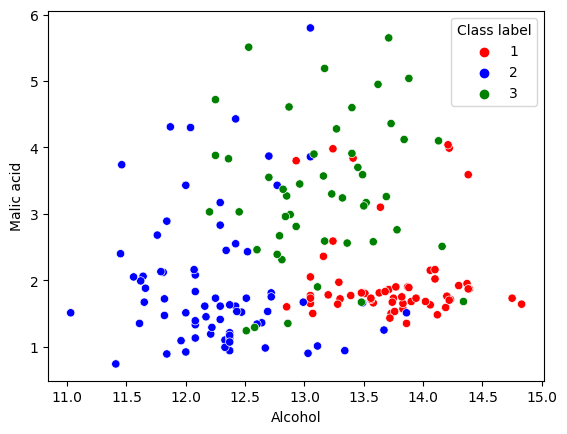

In [5]:
import seaborn as sns

color_dict={1:'red', 3:'green', 2:'blue'}
sns.scatterplot(x = df['Alcohol'], y = df['Malic acid'],hue=df['Class label'],palette=color_dict)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis =1), df['Class label'], 
                                                    test_size = 0.3, random_state = 0)

In [7]:
print(f'X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\nY_train shape: {y_train.shape}\nY_test shape: {y_test.shape}')

X_train shape: (124, 2)
X_test shape: (54, 2)
Y_train shape: (124,)
Y_test shape: (54,)


# Robust Scaling

In [8]:
from sklearn.preprocessing import RobustScaler

scale = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scale.fit(X_train)

# transform train and test sets
X_train_scale = scale.transform(X_train)
X_test_scale = scale.transform(X_test)

In [9]:
X_train_scale = pd.DataFrame(X_train_scale, columns = X_train.columns)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)

In [10]:
X_train.head()

,Alcohol,Malic acid
22,13.71,1.86
108,12.22,1.29
175,13.27,4.28
145,13.16,3.57
71,13.86,1.51


In [11]:
X_train_scale.head()

,Alcohol,Malic acid
0,0.524462,-0.015244
1,-0.641879,-0.362805
2,0.180039,1.460366
3,0.093933,1.027439
4,0.641879,-0.228659


In [12]:
np.round(X_train.describe(), 2)

,Alcohol,Malic acid
count,124.00,124.00
mean,12.98,2.38
std,0.80,1.14
min,11.03,0.89
25%,12.36,1.61
50%,13.04,1.88
75%,13.64,3.25
max,14.75,5.65


In [13]:
np.round(X_train_scale.describe(),2)

,Alcohol,Malic acid
count,124.00,124.00
mean,-0.04,0.30
std,0.63,0.69
min,-1.57,-0.61
25%,-0.53,-0.17
50%,0.00,0.00
75%,0.47,0.83
max,1.34,2.30


## We could observe that all statistical values get affected

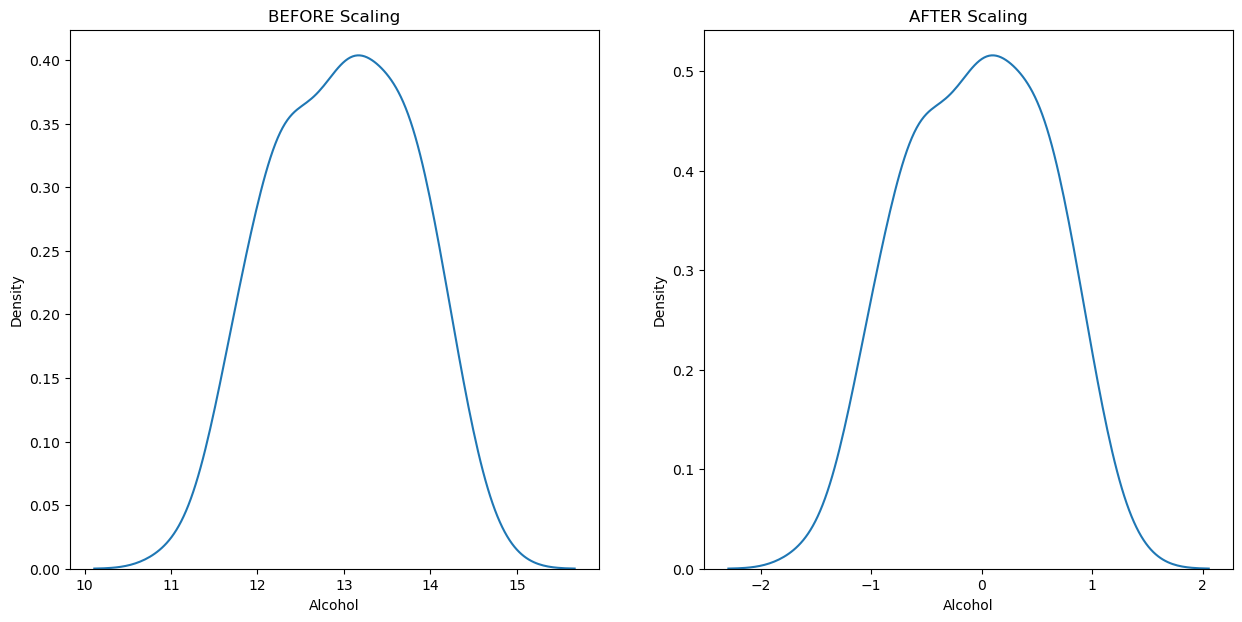

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,7))

# Before scaling - Alcohol
sns.kdeplot(X_train['Alcohol'], ax = ax1)
ax1.set_title('BEFORE Scaling')

# After scaling - Alcohol
sns.kdeplot(X_train_scale['Alcohol'], ax = ax2)
ax2.set_title('AFTER Scaling')
plt.show()

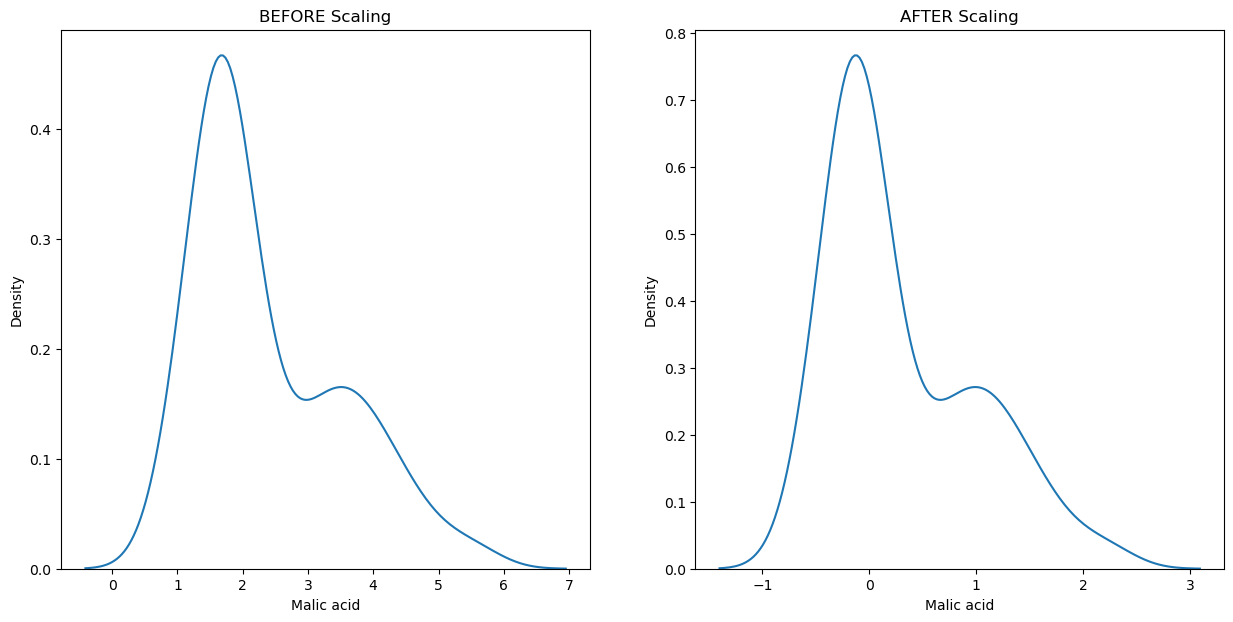

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15,7))

# Before scaling - Alcohol
sns.kdeplot(X_train['Malic acid'], ax = ax1)
ax1.set_title('BEFORE Scaling')

# After scaling - Alcohol
sns.kdeplot(X_train_scale['Malic acid'], ax = ax2)
ax2.set_title('AFTER Scaling')
plt.show()

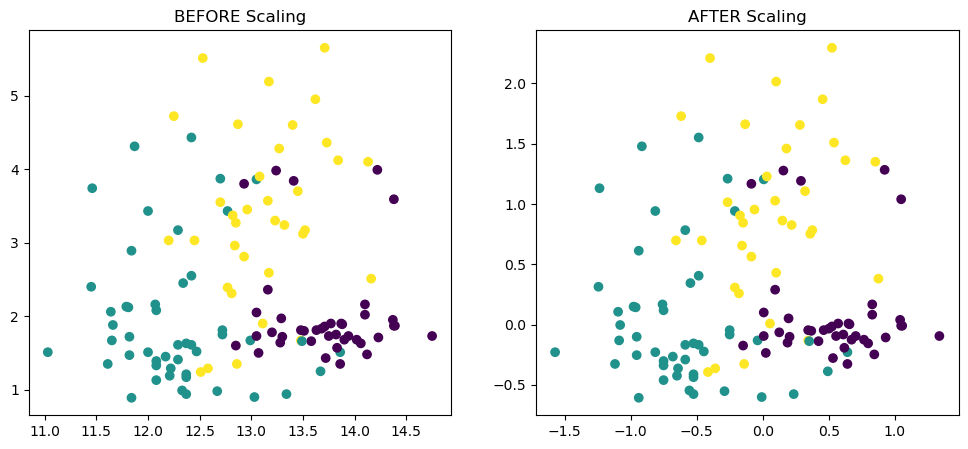

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("BEFORE Scaling")

ax2.scatter(X_train_scale['Alcohol'], X_train_scale['Malic acid'],c=y_train)
ax2.set_title("AFTER Scaling")
plt.show()

# Observing Robust Scaling effect on model training

In [17]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression()
lg_scale = LogisticRegression()

In [18]:
lg.fit(X_train,y_train)
lg_scale.fit(X_train_scale, y_train)

LogisticRegression()

In [19]:
y_pred = lg.predict(X_test)
y_pred_scale = lg_scale.predict(X_test_scale)

In [20]:
from sklearn.metrics import accuracy_score

print("Actual data", accuracy_score(y_test,y_pred))
print("Scaled data", accuracy_score(y_test,y_pred_scale))

Actual data 0.7592592592592593
Scaled data 0.7592592592592593


# Observe Outlier in Robust Data

In [21]:
# add outlier in data 

df = df.append(pd.DataFrame({'Alcohol':[15,18,20],'Malic acid':[30,35,31],'Class label':[0,1,1]}),ignore_index=True)
df.tail()

,Class label,Alcohol,Malic acid
176,3,13.17,2.59
177,3,14.13,4.10
178,0,15.00,30.00
179,1,18.00,35.00
180,1,20.00,31.00


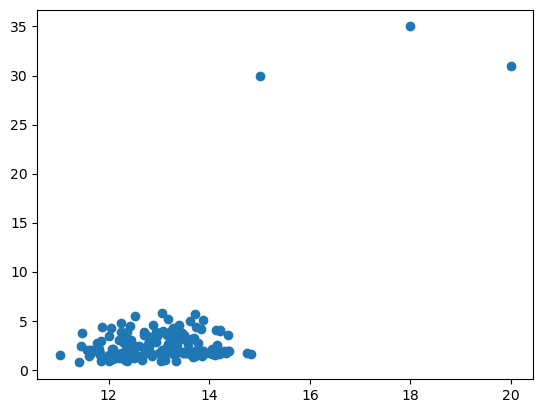

In [22]:
plt.scatter(df['Alcohol'], df['Malic acid'])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis =1), df['Class label'], 
                                                    test_size = 0.3, random_state = 0)

In [24]:
outlier_scale =RobustScaler()

# fit the scaler to the train set, it will learn the parameters
outlier_scale.fit(X_train)

# transform train and test sets
X_train_outlier_scale = outlier_scale.transform(X_train)
X_test_outlier_scale = outlier_scale.transform(X_test)

In [25]:
X_train_outlier_scale = pd.DataFrame(X_train_outlier_scale, columns=X_train.columns)
X_test_outlier_scale = pd.DataFrame(X_test_outlier_scale, columns=X_test.columns)

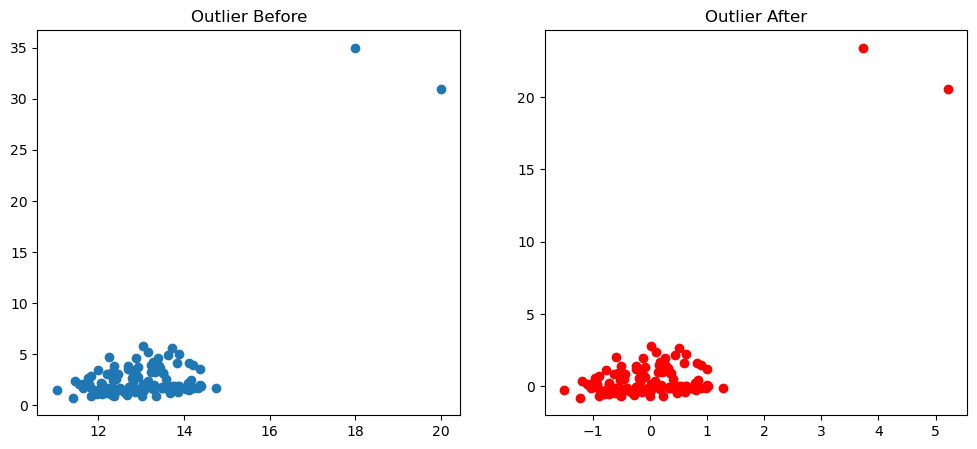

In [26]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'])
ax1.set_title("Outlier Before")
ax2.scatter(X_train_outlier_scale['Alcohol'], X_train_outlier_scale['Malic acid'],color='red')
ax2.set_title("Outlier After")
plt.show()